In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = 10,10

### Reading the data

In [3]:
#Read the data
data = pd.read_csv("Unicorn Club 2021.csv")
data.head(5)

,Company,Valuation ($B),Country,Category,Select Investors
0,Bytedance,$140.00,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$74.00,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Didi Chuxing,$62.00,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."
3,Instacart,$39.00,United States,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
4,Stripe,$36.00,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"


### Updating the columns

In [4]:
data.rename(columns = {'Select Investors': 'Investors','Valuation ($B) ':'Valuation in $B'}, inplace = True)

In [5]:
#checking the data types of the columns
data.dtypes

Company            object
Valuation in $B    object
Country            object
Category           object
Investors          object
dtype: object

In [6]:
#Converting Valuation in $B to float
data['Valuation in $B'] = data['Valuation in $B'].replace('[\$,]', '', regex=True).astype(float)
data.dtypes

Company             object
Valuation in $B    float64
Country             object
Category            object
Investors           object
dtype: object

In [7]:
data.head()

,Company,Valuation in $B,Country,Category,Investors
0,Bytedance,140.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,74.0,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Didi Chuxing,62.0,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."
3,Instacart,39.0,United States,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
4,Stripe,36.0,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"


### Countrywise Analysis

In [9]:
# Countries with most unicorns (Top 10)
data['Country'].value_counts()[:10,]

United States     291
China             139
United Kingdom     27
India              25
Germany            16
South Korea        11
Brazil             11
Israel             10
France              9
Indonesia           5
Name: Country, dtype: int64

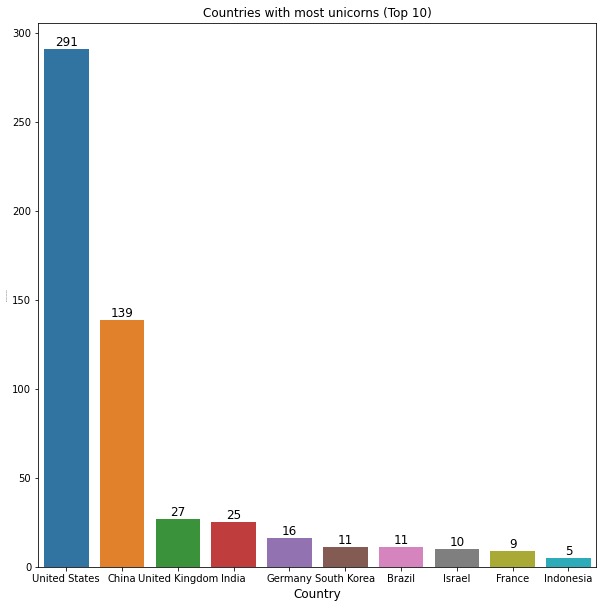

In [10]:
# Visualizing Countries with most unicorns (Top 10)
uni_country  = data['Country'].value_counts()[:10,]
sns.barplot(uni_country.index, uni_country.values)
plt.title('Countries with most unicorns (Top 10)')
plt.ylabel('Number of Occurrences', fontsize=1)
plt.xlabel('Country', fontsize=12)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [11]:
# Valuation countrywise (Top 10)
valuation_country  = data.groupby('Country')['Valuation in $B'].sum().nlargest(10)
valuation_country

Country
United States     939.47
China             539.81
United Kingdom    112.85
India              85.57
Brazil             38.45
Germany            31.17
South Korea        30.38
Indonesia          26.40
Singapore          19.10
Sweden             16.20
Name: Valuation in $B, dtype: float64

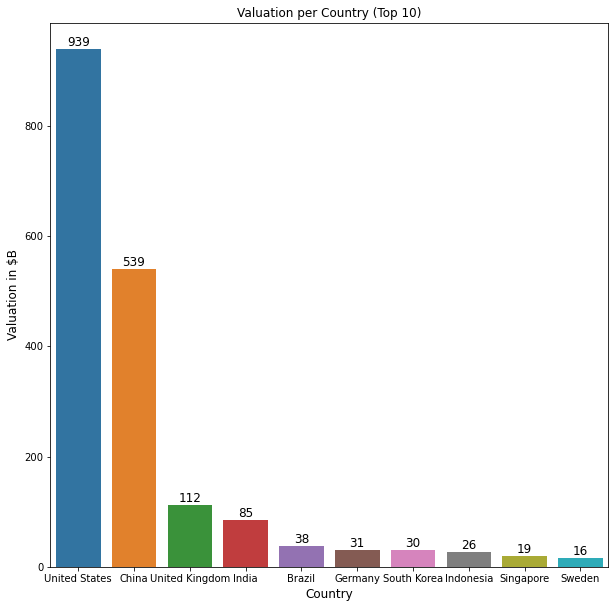

In [12]:
# Visualizing valuation countrywise (Top 10)
sns.barplot(valuation_country.index, valuation_country.values)
plt.title('Valuation per Country (Top 10)')
plt.ylabel('Valuation in $B', fontsize=12)
plt.xlabel('Country', fontsize=12)

# Get current axis on current figure
ax1 = plt.gca()

# Iterate through the list of axes' patches
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

### Categorywise Analysis

In [13]:
# Number of unicorns per category
data['Category'].value_counts()

Internet software & services           92
Fintech                                86
E-commerce & direct-to-consumer        72
Artificial intelligence                49
Health                                 42
Other                                  40
Mobile & telecommunications            33
Supply chain, logistics, & delivery    31
Auto & transportation                  30
Data management & analytics            23
Hardware                               22
Cybersecurity                          20
Consumer & retail                      19
Edtech                                 18
Travel                                 12
Education                               1
Data management & analytics<            1
Name: Category, dtype: int64

In [14]:
#replancing "Data management & analytics<"" with "Data management & analytics" - data cleaning
data = data.replace(['Data management & analytics<'],'Data management & analytics')

In [15]:
# Aggregating categories by number of unicorns and corresponding valuation 
agg=data.groupby('Category').agg({'Company':'count','Valuation in $B': 'sum'})
agg.rename(columns = {'Company': 'Number of Unicorns'}, inplace = True)
agg=agg.reset_index()
agg=agg.sort_values(by=['Number of Unicorns','Valuation in $B'],ascending=False).reset_index(drop = True)
agg

,Category,Number of Unicorns,Valuation in $B
0,Internet software & services,92,229.34
1,Fintech,86,301.21
2,E-commerce & direct-to-consumer,72,172.50
3,Artificial intelligence,49,281.74
4,Health,42,104.81
5,Other,40,161.93
6,Mobile & telecommunications,33,58.45
7,"Supply chain, logistics, & delivery",31,120.64
8,Auto & transportation,30,174.52
9,Data management & analytics,24,65.64


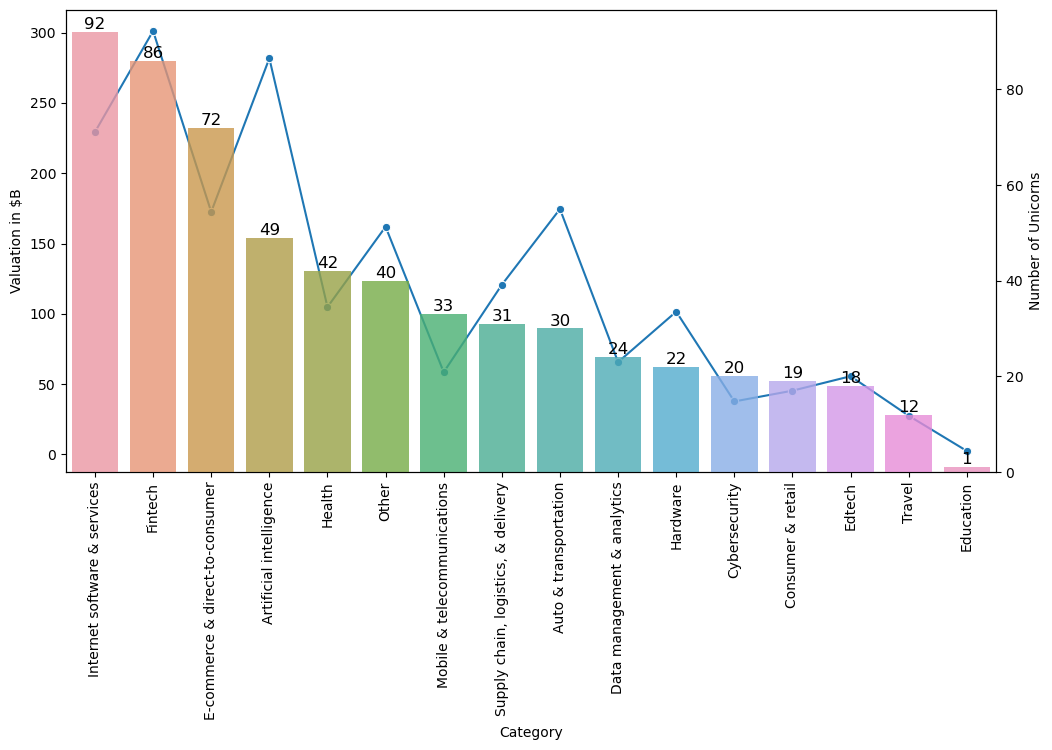

In [16]:
# Comparing valuation by the number of unicorns per category
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

plot1=sns.lineplot(agg['Category'],agg['Valuation in $B'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

#using alpha to set transparency 
plot=sns.barplot(agg['Category'], agg['Number of Unicorns'], ax=ax2,alpha=0.8) 
plot1.set_xticklabels(plot.get_xticklabels(),rotation=90) #rotating the labels

# Get current axis on current figure
axnew = plt.gca()

# Iterate through the list of axes' patches
for p in axnew.patches:
    axnew.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

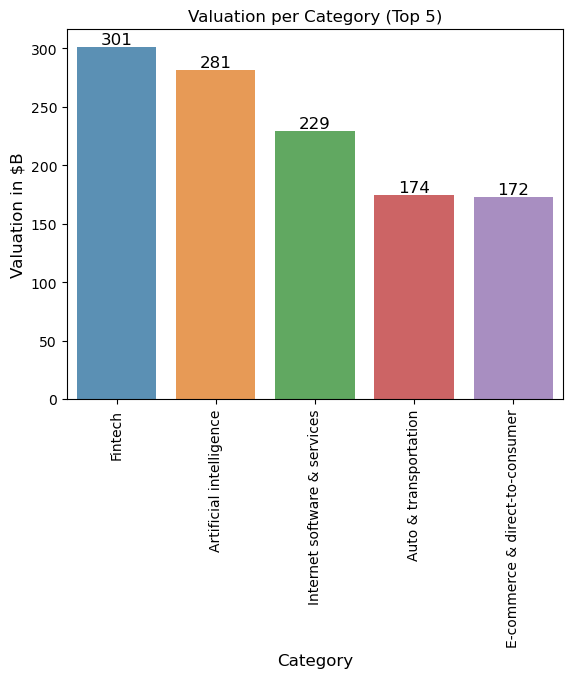

In [17]:
# Valuation per category (Top 5)
valuation_category  = data.groupby('Category')['Valuation in $B'].sum().nlargest(5)
g=sns.barplot(valuation_category.index, valuation_category.values,alpha=0.8)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Valuation per Category (Top 5)')
plt.ylabel('Valuation in $B', fontsize=12)
plt.xlabel('Category', fontsize=12)

# Get current axis on current figure
ax1 = plt.gca()

# Iterate through the list of axes' patches
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

### Companywise Analysis

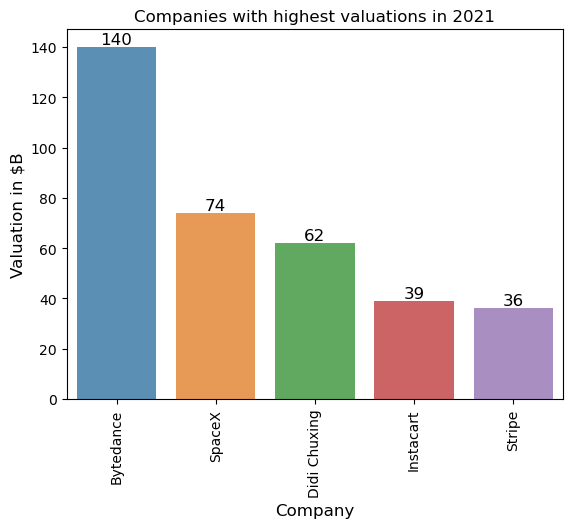

In [18]:
# Top 5 copmanies with highest valuation
valuation_company  = data.groupby('Company')['Valuation in $B'].sum().nlargest(5)
g=sns.barplot(valuation_company.index, valuation_company.values,alpha=0.8)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Companies with highest valuations in 2021')
plt.ylabel('Valuation in $B', fontsize=12)
plt.xlabel('Company', fontsize=12)

# Get current axis on current figure
ax1 = plt.gca()

# Iterate through the list of axes' patches
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

### Top N Unicorns from a Country by Valuation

In [32]:
def TopNbyCountry(N=5,Country='All'):
    if Country == 'All':
        topNval = data.groupby('Company')['Valuation in $B'].sum().nlargest(N)
        topNval = topNval.reset_index()
        top5 = data[data.Company.isin((topNval.Company))]
    else:
        topNval = data[data.Country==Country].groupby('Company')['Valuation in $B'].sum().nlargest(N)
        topNval = topNval.reset_index()
        top5 = data[data.Company.isin((topNval.Company))]
    return top5.reset_index(drop=True)

In [27]:
TopNbyCountry(5,'India')

,Company,Valuation in $B,Country,Category,Investors
0,One97 Communications,16.0,India,Fintech,"Intel Capital, Sapphire Ventures, Alibaba Group"
1,BYJU's,12.0,India,Edtech,"Tencent Holdings, Lightspeed India Partners, S..."
2,OYO Rooms,7.7,India,Travel,"SoftBank Group, Sequoia Capital India,Lightspe..."
3,National Stock Exchange of India,6.5,India,Fintech,"TA Associates, SoftBank Group, GS Growth"
4,Ola Cabs,6.3,India,Auto & transportation,"Accel Partners, SoftBank Group, Sequoia Capital"


In [30]:
TopNbyCountry(4,'United States')

,Company,Valuation in $B,Country,Category,Investors
0,SpaceX,74.0,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
1,Instacart,39.0,United States,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
2,Stripe,36.0,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,UiPath,35.0,United States,Artificial intelligence,"Accel, capitalG, Earlybrid Venture Capital, Se..."


In [31]:
TopNbyCountry(5,'China')

,Company,Valuation in $B,Country,Category,Investors
0,Bytedance,140.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,Didi Chuxing,62.0,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."
2,Yuanfudao,15.5,China,Edtech,"Tencent Holdings, Warbug Pincus, IDG Capital"
3,DJI Innovations,15.0,China,Hardware,"Accel Partners, Sequoia Capital"
4,SHEIN,15.0,China,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."


In [33]:
TopNbyCountry()

,Company,Valuation in $B,Country,Category,Investors
0,Bytedance,140.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,74.0,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Didi Chuxing,62.0,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."
3,Instacart,39.0,United States,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
4,Stripe,36.0,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"


### Top N Unicorns from a Category by Valuation

In [34]:
def TopNbyCategory(N=5,Category='All'):
    if Category == 'All':
        topNval = data.groupby('Company')['Valuation in $B'].sum().nlargest(N)
        topNval = topNval.reset_index()
        top5 = data[data.Company.isin((topNval.Company))]
    else:
        topNval = data[data.Category==Category].groupby('Company')['Valuation in $B'].sum().nlargest(N)
        topNval = topNval.reset_index()
        top5 = data[data.Company.isin((topNval.Company))]
    return top5.reset_index(drop=True)

In [35]:
TopNbyCategory()

,Company,Valuation in $B,Country,Category,Investors
0,Bytedance,140.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,74.0,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Didi Chuxing,62.0,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."
3,Instacart,39.0,United States,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
4,Stripe,36.0,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"


In [36]:
TopNbyCategory(5,'Artificial intelligence')

,Company,Valuation in $B,Country,Category,Investors
0,Bytedance,140.00,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,UiPath,35.00,United States,Artificial intelligence,"Accel, capitalG, Earlybrid Venture Capital, Se..."
2,SenseTime,12.00,China,Artificial intelligence,"Star VC, IDG Capital, Infore Capital, Alibaba ..."
3,Argo AI,7.25,United States,Artificial intelligence,"Volkswagen Group, Ford Autonomous Vehicles"
4,Automation Anywhere,6.80,United States,Artificial intelligence,"General Atlantic, Goldman Sachs, New Enterpris..."


In [37]:
TopNbyCategory(5,'Edtech')

,Company,Valuation in $B,Country,Category,Investors
0,Yuanfudao,15.5,China,Edtech,"Tencent Holdings, Warbug Pincus, IDG Capital"
1,BYJU's,12.0,India,Edtech,"Tencent Holdings, Lightspeed India Partners, S..."
2,VIPKid,4.5,China,Edtech,"Sequoia Capital China, Tencent Holdings, Sinov..."
3,Udemy,3.2,United States,Edtech,"MHS Capital, Insight Partners, Norwest Venture..."
4,Zuoyebang,3.0,China,Edtech,"Sequoia Capital China, Xiang He Capital, GGV C..."


In [38]:
TopNbyCategory(5,'Health')

,Company,Valuation in $B,Country,Category,Investors
0,Samumed,12.00,United States,Health,"Vickers Venture Partners, IKEA GreenTech"
1,Roivant Sciences,9.09,United States,Health,"SoftBankGroup, Founders Fund"
2,Tempus,8.10,United States,Health,"New Enterprise Associates, T. Rowe Associates,..."
3,We Doctor,6.78,China,Health,"Tencent, Morningside Group"
4,United Imaging Healthcare,5.00,China,Health,"China Life Insurance, China Development Bank C..."
